In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [26]:
# Функции-утилиты для работы с категориальными данными
from tensorflow.keras import utils

# Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.models import Sequential

# Основные слои
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D


In [27]:
values = pd.read_csv('MEP_2.csv')
print(values.shape)
#values = values.drop(values.columns[0], axis=1)
#Удаляем дублирующий индекс
#values = values.drop(values.columns[21], axis=1) #
values.head(2)

(216, 77)


,Т,Y1,Y2,X1,X2,X3,X4,X5,X6,X7,...,Z88,Z89,Z90,Z91,Z92,Z93,Z94,Z95,Z98,Z99
0,1/1/2005,1486.333333,2.62,99.4,515,1838.0,2859,386.0,148.1,80.9,...,151.5,1254.3,4298.2,3094,309,7168,9615,1624,1486.33,632.76
1,2/1/2005,1486.333333,1.23,99.1,530,1832.0,2542,357.7,184.5,89.9,...,157.5,1281.5,4373.8,2811,335,7647,9653,1905,1486.33,632.76


In [28]:
# ['Z58','X11','Z70','X12','Z66','X26','Z11','Z21','Z9','Z10','X10','Z25','Z71','X25','Z62']
# Для инфляции
#DF_hi_korr = values[['X11','X12','X26','Z11','Z9','Z10','X10','X25','Z62']]
#print(DF_hi_korr.shape)


In [29]:
#Для ВВП
DF_hi_korr = values[['Z26','Z27','Z7','Z28','Z10','X5','X17','X8','Z60']]
print(DF_hi_korr.shape)

(216, 9)


In [30]:
x_train = pd.concat([DF_hi_korr.iloc[:50]/5000 ,DF_hi_korr.iloc[100:209]/5000])
x_train = x_train.reset_index(drop=True)

x_test = DF_hi_korr.iloc[50:100]/5000

print(x_train.shape,x_test.shape)

(159, 9) (50, 9)


<Axes: >

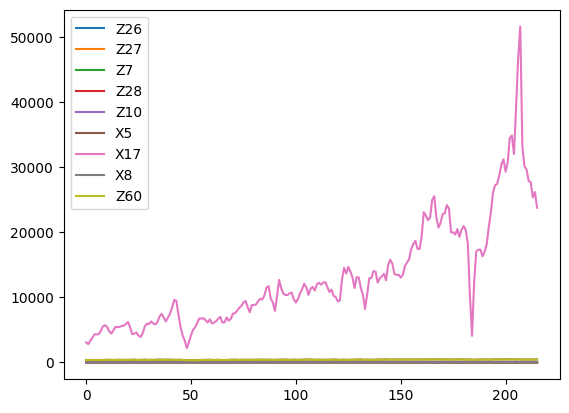

In [31]:
DF_hi_korr.plot()

In [32]:
y_train_VVP = values['Y1']/5000
y_train_VVP = y_train_VVP.reset_index(drop=True)
# y_train_INF = pd.concat([values[:50].filter(like='Y2'),values[105:].filter(like='Y2')])
# y_train_INF = y_train_INF.reset_index(drop=True)
print(y_train_VVP.shape,y_train_VVP.shape)


(216,) (216,)


In [33]:

y_test_vvp = values['Y1']/5000
y_test_vvp = y_test_vvp.reset_index(drop=True)
y_test_vvp.shape
# y_test_inf = values[50:95].filter(like='Y2')
# y_test_inf = y_test_inf.reset_index(drop=True)

(216,)

<Axes: >

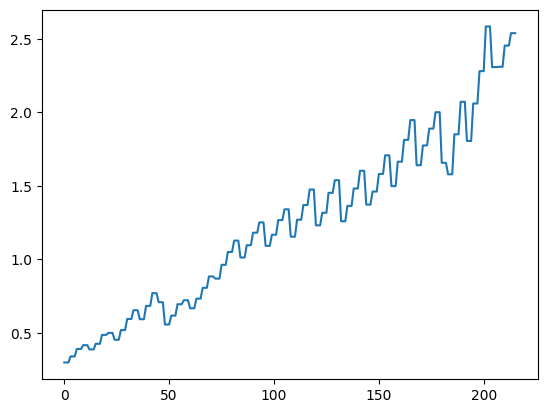

In [34]:
y_test_vvp.plot()

<Axes: >

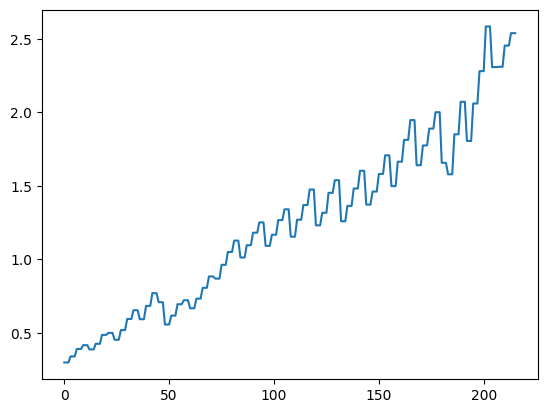

In [35]:
y_train_VVP.plot()

In [36]:
time_steps=3
features = 9

In [37]:
# Инициализация массива x_train
x_train2 = np.zeros((x_train.shape[0] - time_steps + 1, time_steps, features))
y_train_v = np.zeros((x_train.shape[0] - time_steps + 1))
# Заполнение массива x_train окнами размером time_steps
for i in range(x_train.shape[0] - time_steps + 1):
    x_train2[i] = x_train.iloc[i:i+time_steps].values
    y_train_v[i] = y_train_VVP.iloc[i+time_steps+2:i+time_steps+3].values

print(x_train2.shape,y_train_v.shape)

(157, 3, 9) (157,)


In [38]:
# Инициализация массива x_test
x_test2 = np.zeros((x_test.shape[0] - time_steps + 1, time_steps, features))
y_test_v = np.zeros((x_test.shape[0] - time_steps + 1))
# Заполнение массива x_test окнами размером time_steps
for i in range(x_test.shape[0] - time_steps + 1):
    x_test2[i] = x_test.iloc[i:i+time_steps].values
    y_test_v[i] = y_test_vvp.iloc[i+time_steps+2:i+time_steps+3].values

print(x_test2.shape, y_test_v.shape)

(48, 3, 9) (48,)


In [39]:
model2 = Sequential()
model2.add(LSTM(units=60, input_shape=(time_steps, features)))
model2.add(Dense(units = 100))
model2.add(Dense(units = 15))
model2.add(Dense(units=1))
model2.compile(loss='mae', optimizer='adam')
model2.fit(x_train2, y_train_v, epochs=80, batch_size=36, validation_data=(x_test2, y_test_v))

Epoch 1/80
5/5 [==============================] - 4s 134ms/step - loss: 0.6555 - val_loss: 0.2619
Epoch 2/80
5/5 [==============================] - 0s 12ms/step - loss: 0.2720 - val_loss: 0.2421
Epoch 3/80
5/5 [==============================] - 0s 15ms/step - loss: 0.1517 - val_loss: 0.0669
Epoch 4/80
5/5 [==============================] - 0s 12ms/step - loss: 0.1728 - val_loss: 0.2269
Epoch 5/80
5/5 [==============================] - 0s 16ms/step - loss: 0.1626 - val_loss: 0.2647
Epoch 6/80
5/5 [==============================] - 0s 16ms/step - loss: 0.1354 - val_loss: 0.1345
Epoch 7/80
5/5 [==============================] - 0s 12ms/step - loss: 0.1480 - val_loss: 0.2100
Epoch 8/80
5/5 [==============================] - 0s 13ms/step - loss: 0.1316 - val_loss: 0.2391
Epoch 9/80
5/5 [==============================] - 0s 11ms/step - loss: 0.1233 - val_loss: 0.1799
Epoch 10/80
5/5 [==============================] - 0s 13ms/step - loss: 0.1218 - val_loss: 0.2256
Epoch 11/80
5/5 [===========

In [40]:
model2.fit(x_train2, y_train_v, epochs=15, batch_size=8, validation_data=(x_test2, y_test_v))

Epoch 1/15
20/20 [==============================] - 0s 9ms/step - loss: 0.1227 - val_loss: 0.2709
Epoch 2/15
20/20 [==============================] - 0s 8ms/step - loss: 0.1288 - val_loss: 0.1693
Epoch 3/15
20/20 [==============================] - 0s 7ms/step - loss: 0.1209 - val_loss: 0.1853
Epoch 4/15
20/20 [==============================] - 0s 7ms/step - loss: 0.1196 - val_loss: 0.2581
Epoch 5/15
20/20 [==============================] - 0s 8ms/step - loss: 0.1259 - val_loss: 0.1911
Epoch 6/15
20/20 [==============================] - 0s 7ms/step - loss: 0.1208 - val_loss: 0.2088
Epoch 7/15
20/20 [==============================] - 0s 7ms/step - loss: 0.1276 - val_loss: 0.2593
Epoch 8/15
20/20 [==============================] - 0s 6ms/step - loss: 0.1235 - val_loss: 0.2591
Epoch 9/15
20/20 [==============================] - 0s 5ms/step - loss: 0.1201 - val_loss: 0.2139
Epoch 10/15
20/20 [==============================] - 0s 5ms/step - loss: 0.1189 - val_loss: 0.1840
Epoch 11/15
20/20 [

In [41]:
pref_dfv1 = model2.predict(x_test2)

2/2 [==============================] - 1s 8ms/step


In [42]:
pref_dfv1

array([[0.4453864 ],
       [0.48973975],
       [0.5313361 ],
       [0.5587459 ],
       [0.5723547 ],
       [0.56505114],
       [0.5508828 ],
       [0.5501358 ],
       [0.53812826],
       [0.5355124 ],
       [0.53225136],
       [0.54987544],
       [0.5700289 ],
       [0.5613222 ],
       [0.54790765],
       [0.5513879 ],
       [0.5563321 ],
       [0.56671   ],
       [0.58444726],
       [0.60960394],
       [0.63537025],
       [0.6552895 ],
       [0.6778693 ],
       [0.70465404],
       [0.72555345],
       [0.7186095 ],
       [0.6848946 ],
       [0.6775548 ],
       [0.6870471 ],
       [0.7075743 ],
       [0.7212634 ],
       [0.74031734],
       [0.75414175],
       [0.7709952 ],
       [0.80603075],
       [0.8413161 ],
       [0.82602406],
       [0.782202  ],
       [0.71028465],
       [0.72287494],
       [0.79775816],
       [0.8533964 ],
       [0.8535849 ],
       [0.8154048 ],
       [0.7981007 ],
       [0.7997186 ],
       [0.8063719 ],
       [0.791

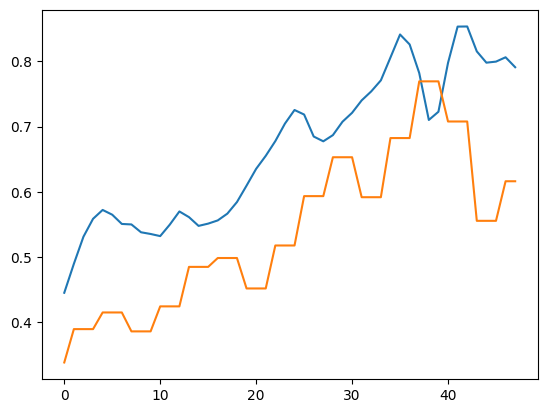

In [43]:
plt.plot(pref_dfv1)
plt.plot(y_test_v)

In [44]:
# Создание LSTM модели для ВВП
model_v = Sequential()
model_v.add(LSTM(50, input_shape=(time_steps, features)))

#model_v.add(Dense(100))
model_v.add(Dense(10))

model_v.add(Dense(1))

# Компиляция модели
model_v.compile(optimizer='adam', loss='mse')

# Обучение модели
model_v.fit(x_train2, y_train_v, epochs=15, batch_size=16, validation_data=(x_test2, y_test_v))

Epoch 1/15
10/10 [==============================] - 3s 59ms/step - loss: 0.6251 - val_loss: 0.0044
Epoch 2/15
10/10 [==============================] - 0s 6ms/step - loss: 0.0459 - val_loss: 0.1268
Epoch 3/15
10/10 [==============================] - 0s 8ms/step - loss: 0.0649 - val_loss: 0.0855
Epoch 4/15
10/10 [==============================] - 0s 7ms/step - loss: 0.0258 - val_loss: 0.0350
Epoch 5/15
10/10 [==============================] - 0s 7ms/step - loss: 0.0297 - val_loss: 0.0389
Epoch 6/15
10/10 [==============================] - 0s 8ms/step - loss: 0.0265 - val_loss: 0.0593
Epoch 7/15
10/10 [==============================] - 0s 6ms/step - loss: 0.0256 - val_loss: 0.0558
Epoch 8/15
10/10 [==============================] - 0s 7ms/step - loss: 0.0253 - val_loss: 0.0501
Epoch 9/15
10/10 [==============================] - 0s 9ms/step - loss: 0.0253 - val_loss: 0.0544
Epoch 10/15
10/10 [==============================] - 0s 8ms/step - loss: 0.0251 - val_loss: 0.0527
Epoch 11/15
10/10 

In [45]:
model_v.fit(x_train2, y_train_v, epochs=10, batch_size=4, validation_data=(x_test2, y_test_v))

Epoch 1/10
40/40 [==============================] - 1s 16ms/step - loss: 0.0259 - val_loss: 0.0525
Epoch 2/10
40/40 [==============================] - 0s 4ms/step - loss: 0.0261 - val_loss: 0.0540
Epoch 3/10
40/40 [==============================] - 0s 5ms/step - loss: 0.0253 - val_loss: 0.0781
Epoch 4/10
40/40 [==============================] - 0s 4ms/step - loss: 0.0275 - val_loss: 0.0408
Epoch 5/10
40/40 [==============================] - 0s 9ms/step - loss: 0.0298 - val_loss: 0.0827
Epoch 6/10
40/40 [==============================] - 0s 4ms/step - loss: 0.0268 - val_loss: 0.0537
Epoch 7/10
40/40 [==============================] - 0s 4ms/step - loss: 0.0253 - val_loss: 0.0440
Epoch 8/10
40/40 [==============================] - 0s 5ms/step - loss: 0.0260 - val_loss: 0.0633
Epoch 9/10
40/40 [==============================] - 0s 8ms/step - loss: 0.0252 - val_loss: 0.0734
Epoch 10/10
40/40 [==============================] - 0s 4ms/step - loss: 0.0257 - val_loss: 0.0440


5/5 [==============================] - 1s 3ms/step


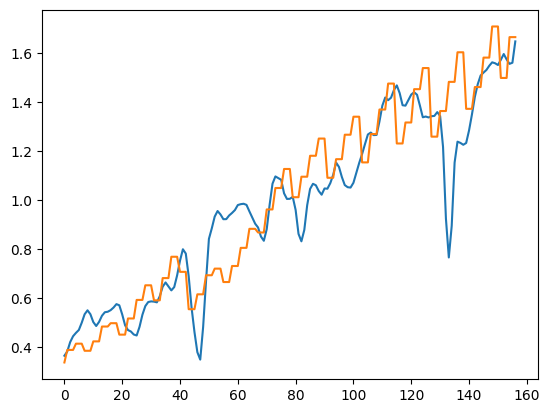

In [46]:
pred_dfv = model_v.predict(x_train2)
plt.plot(pred_dfv)
plt.plot(y_train_v)

In [47]:
# Для инфляции
DF_hi_korr = values[['X11','X12','X26','Z11','Z9','Z10','X10','X25','Z62']]
print(DF_hi_korr.shape)

x_train = pd.concat([DF_hi_korr.iloc[:50]/1000 ,DF_hi_korr.iloc[100:208]/1000])
x_train = x_train.reset_index(drop=True)

x_test = DF_hi_korr.iloc[50:98]/1000
x_test = x_test.reset_index(drop=True)

print(x_train.shape,x_test.shape)


(216, 9)
(158, 9) (48, 9)


<Axes: >

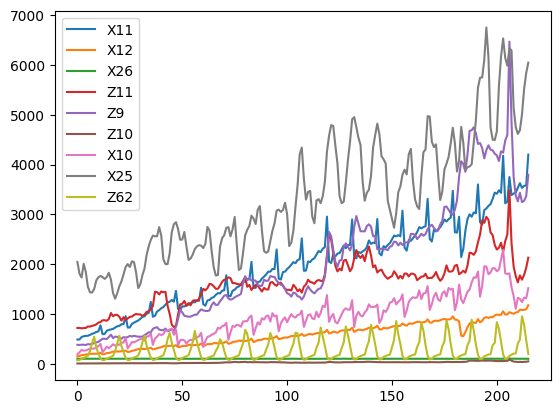

In [48]:
DF_hi_korr.plot()

In [49]:
# y_train_VVP = pd.concat([values[:50].filter(like='Y1'),values[105:].filter(like='Y1')])
# y_train_VVP = y_train_VVP.reset_index(drop=True)
#y_train_INF = pd.concat([values[:50].filter(like='Y2'),values[105:].filter(like='Y2')])
y_train_INF = values['Y2']/1000
y_train_INF = y_train_INF.reset_index(drop=True)
print(y_train_INF.shape)

(216,)


In [50]:
# y_test_vvp = values[50:95].filter(like='Y1')
# y_test_vvp = y_test_vvp.reset_index(drop=True)
y_test_inf = values.filter(like='Y2')/1000
y_test_inf = y_test_inf.reset_index(drop=True)
print(y_test_vvp.shape,y_test_inf.shape)

(216,) (216, 1)


In [51]:
time_steps=3
features = 9

In [52]:
# Инициализация массива x_train
x_train2 = np.zeros((x_train.shape[0] - time_steps + 1, time_steps, features))
y_train_i = np.zeros((x_train.shape[0] - time_steps + 1))
# Заполнение массива x_train окнами размером time_steps
for i in range(x_train.shape[0] - time_steps + 1):
    x_train2[i] = x_train.iloc[i:i+time_steps].values
    y_train_i[i] = y_train_INF.iloc[i+time_steps+2:i+time_steps+3].values

print(x_train2.shape,y_train_i.shape)

(156, 3, 9) (156,)


In [53]:
# Инициализация массива x_test
x_test2 = np.zeros((x_test.shape[0] - time_steps + 1, time_steps, features))
y_test_i = np.zeros((x_test.shape[0] - time_steps + 1))
# Заполнение массива x_test окнами размером time_steps
for i in range(x_test.shape[0] - time_steps + 1):
    x_test2[i] = x_test.iloc[i:i+time_steps].values
    y_test_i[i] = y_test_inf.iloc[i+time_steps+2:i+time_steps+3].values

print(x_test2.shape, y_test_i.shape)

(46, 3, 9) (46,)


In [61]:
from keras.layers.convolutional.conv1d import activations
# Создание LSTM модели для ВВП
model_i = Sequential()
model_i.add(LSTM(50, input_shape=(time_steps, features)))
model_i.add(Dense(150))

model_i.add(Dropout(0.2))
model_i.add(Dense(130))
model_i.add(Dense(1))

# Компиляция модели
model_i.compile(optimizer='adam', loss='mse')

# Обучение модели
model_i.fit(x_train2, y_train_i, epochs=50, batch_size=16, validation_data=(x_test2, y_test_i))

Epoch 1/50
10/10 [==============================] - 3s 63ms/step - loss: 0.0389 - val_loss: 0.0215
Epoch 2/50
10/10 [==============================] - 0s 9ms/step - loss: 0.0128 - val_loss: 4.2297e-04
Epoch 3/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0048 - val_loss: 1.7781e-04
Epoch 4/50
10/10 [==============================] - 0s 8ms/step - loss: 0.0027 - val_loss: 3.7545e-04
Epoch 5/50
10/10 [==============================] - 0s 9ms/step - loss: 0.0021 - val_loss: 1.5313e-05
Epoch 6/50
10/10 [==============================] - 0s 9ms/step - loss: 0.0012 - val_loss: 1.7692e-05
Epoch 7/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0011 - val_loss: 1.3563e-05
Epoch 8/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0010 - val_loss: 1.3770e-05
Epoch 9/50
10/10 [==============================] - 0s 9ms/step - loss: 7.4722e-04 - val_loss: 9.9686e-05
Epoch 10/50
10/10 [==============================] - 0s 8ms/step - loss: 6.3183e-

In [63]:
# Обучение модели
model_i.fit(x_train2, y_train_i, epochs=30, batch_size=8, validation_data=(x_test2, y_test_i))

Epoch 1/30
20/20 [==============================] - 0s 8ms/step - loss: 6.0486e-05 - val_loss: 1.1418e-05
Epoch 2/30
20/20 [==============================] - 0s 6ms/step - loss: 4.6703e-05 - val_loss: 1.6057e-06
Epoch 3/30
20/20 [==============================] - 0s 9ms/step - loss: 4.3135e-05 - val_loss: 3.0027e-05
Epoch 4/30
20/20 [==============================] - 0s 9ms/step - loss: 4.2570e-05 - val_loss: 5.5648e-05
Epoch 5/30
20/20 [==============================] - 0s 10ms/step - loss: 4.9994e-05 - val_loss: 1.4280e-05
Epoch 6/30
20/20 [==============================] - 0s 9ms/step - loss: 4.1164e-05 - val_loss: 3.9886e-05
Epoch 7/30
20/20 [==============================] - 0s 8ms/step - loss: 4.4069e-05 - val_loss: 2.3445e-06
Epoch 8/30
20/20 [==============================] - 0s 8ms/step - loss: 4.8169e-05 - val_loss: 1.1025e-06
Epoch 9/30
20/20 [==============================] - 0s 9ms/step - loss: 3.5094e-05 - val_loss: 2.1113e-06
Epoch 10/30
20/20 [==========================

2/2 [==============================] - 0s 6ms/step


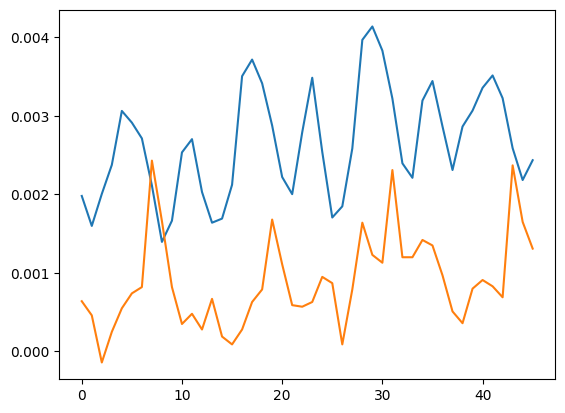

In [64]:
pred_df_i = model_i.predict(x_test2)
plt.plot(pred_df_i)
plt.plot(y_test_i)